In [4]:
# Set up
%pylab inline

# Params
DATADIR = "/storage/mgymrek/gtex-estrs/revision/"
RESULTSDIR = "/storage/mgymrek/gtex-estrs/revision/figures"
GENEANNOT = "/storage/resources/dbase/human/hg19/gencode_gene_annotations_hg19.csv"
HIPREF = "/storage/resources/dbase/human/hg19/hg19.hipstr_reference_withmotif_stranded.bed"
SAVEPLOT = True

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm

# Import libraries
import os
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.stats.multitest


############ Load data #############
examples = []


# RFT1
rft1_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/HeightYengo_ENSG00000163933_Esophagus-Muscularis_combined.txt"
rft1_str_pos = 53128363
rft1_str_pval = 5.6679678249727875e-31
examples.append(["Height-RFT1", rft1_pvals_file, rft1_str_pos, rft1_str_pval])

##### IBD >0.9 coloc ####
# APEH
apeh_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/IBDHuang_ENSG00000164062_Esophagus-Mucosa_combined.txt"
apeh_str_pos = 49711229
apeh_str_pval = 3.918360847610995e-06
examples.append(["APEH-IBD", apeh_pvals_file, apeh_str_pos, apeh_str_pval])

##### Intelligence >0.9 coloc ####
abcb9_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/IntelligenceSavageJensen_ENSG00000150967_Skin-NotSunExposed_combined.txt"
abcb9_str_pos = 123517025
abcb9_str_pval = 1.0572875075585864e-09
examples.append(["ABCB9-Int", abcb9_pvals_file, abcb9_str_pos, abcb9_str_pval])

arhgap27_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/IntelligenceSavageJensen_ENSG00000159314_Skin-NotSunExposed_combined.txt"
arhgap27_str_pos = 43489162
arhgap27_str_pval = 8.364240753033339e-10 # Skin-NotSunExposed
examples.append(["ARHGAP27-Int", arhgap27_pvals_file, arhgap27_str_pos, arhgap27_str_pval])

disp2_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/IntelligenceSavageJensen_ENSG00000140323_Esophagus-Muscularis_combined.txt"
disp2_str_pos = 40643044
disp2_str_pval = 1.4913635804208524e-14 # Esophagus-Muscularis
examples.append(["DISP2-Int", disp2_pvals_file, disp2_str_pos, disp2_str_pval])

kiaa1875_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/IntelligenceSavageJensen_ENSG00000179698_Adipose-Subcutaneous_combined.txt"
kiaa1875_str_pos = 145136543
kiaa1875_str_pval = 5.436463743293308e-18 # Adipose-Sub
examples.append(["KIAA1875-Int", kiaa1875_pvals_file, kiaa1875_str_pos, kiaa1875_str_pval])

##### SCZ >0.9 coloc ####
abcb9_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/SCZPGC_ENSG00000150967_Skin-NotSunExposed_combined.txt"
abcb9_str_pos = 123517025
abcb9_str_pval = 1.0572875075585864e-09
examples.append(["ABCB9-SCZ", abcb9_pvals_file, abcb9_str_pos, abcb9_str_pval])

med19_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/SCZPGC_ENSG00000156603_Adipose-Subcutaneous_combined.txt"
med19_str_pos = 57523883
med19_str_pval = 3.0874239480837706e-13
examples.append(["MED19-SCZ", med19_pvals_file, med19_str_pos, med19_str_pval])

prr12_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/SCZPGC_ENSG00000126464_Thyroid_combined.txt"
prr12_str_pos = 50110619
prr12_str_pval = 2.447964622018442e-16# Thyroid
examples.append(["PRR12-SCZ", prr12_pvals_file, prr12_str_pos, prr12_str_pval])

glyctk_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/SCZPGC_ENSG00000168237_WholeBlood_combined.txt"
glyctk_str_pos = 52341945
glyctk_str_pval = 1.6101668556061633e-09 # WholeBlood
examples.append(["GLYCTK-SCZ", glyctk_pvals_file, glyctk_str_pos, glyctk_str_pval])

vps29_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/SCZPGC_ENSG00000111237_Esophagus-Mucosa_combined.txt"
vps29_str_pos = 110836226
vps29_str_pval = 3.2996745231993753e-09 # Espoh-Mucosa
examples.append(["VPS29-SCZ", vps29_pvals_file, vps29_str_pos, vps29_str_pval])

##### Height >0.9 coloc ####
pdcd2_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/HeightYengo_ENSG00000071994_Brain-Cerebellum_combined.txt"
pdcd2_str_pos = 170895028
pdcd2_str_pval = 4.58899342309099e-11 # Brain-Cerebellum
examples.append(["PDCD2-Height", pdcd2_pvals_file, pdcd2_str_pos, pdcd2_str_pval])

l1td1_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/HeightYengo_ENSG00000240563_Nerve-Tibial_combined.txt"
l1td1_str_pos = 62650593
l1td1_str_pval = 3.1391449068011086e-32
examples.append(["L1TD1-Height", l1td1_pvals_file, l1td1_str_pos, l1td1_str_pval])

hoxb6_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/HeightYengo_ENSG00000108511_Muscle-Skeletal_combined.txt"
hoxb6_str_pos = 46673135
hoxb6_str_pval = 6.301597106579774e-05
examples.append(["HOXB6-Height", hoxb6_pvals_file, hoxb6_str_pos, hoxb6_str_pval])

abcb9_pvals_file = "/storage/mgymrek/gtex-estrs/revision/coloc/tmp/HeightYengo_ENSG00000150967_Skin-NotSunExposed_combined.txt"
abcb9_str_pos = 123517025
abcb9_str_pval = 1.0572875075585864e-09
examples.append(["ABCB9-Height", abcb9_pvals_file, abcb9_str_pos, abcb9_str_pval])


Populating the interactive namespace from numpy and matplotlib


In [2]:
def LogP(p):
    return -1*np.log10(p)

def PlotColoc(pvalfile, strpos, strpval, label=None, fname=None):
    pvals = pd.read_csv(pvalfile, sep=" ")
    try:
        coloc = pd.read_csv(pvalfile+".coloc.txt")
        coloc["order"] = coloc["results.snp"].apply(lambda x: int(x.split(".")[1]))
        coloc = coloc.sort_values("order")
        pvals["coloc.p"] = list(coloc["results.SNP.PP.H4"])
    except:
        pass

    
    fig = plt.figure()
    fig.set_size_inches((7, 6))

    ax = fig.add_subplot(311)
    ax.scatter(pvals["snppos"], pvals["gtex.p"].apply(LogP), color="black", s=5)
    ax.scatter([strpos], [LogP(strpval)], color="red", marker="*", s=30)
    ax.set_ylabel("Expression -log10 P", size=15)
    ax.set_xticks([])
    ax.set_title(label)

    ax = fig.add_subplot(312)
    ax.scatter(pvals["snppos"], pvals["gwas.p"].apply(LogP), color="black", s=5)
    print("%s:%s"%(label, min(pvals["gwas.p"])))
    ax.axhline(y=LogP(5*10**-8), linestyle="dashed", color="gray")
    ax.set_ylabel("GWAS -log10 P", size=15)
    #ax.set_ylim(bottom=0, top=10)

    try:
        ldvals = pd.read_csv(pvalfile.replace("combined", "LD"), sep="\t")
        ax = fig.add_subplot(313)
        ax.scatter(ldvals["snppos"], ldvals["ld"], color="black", s=5)
        ax.set_ylabel("LD", size=15)
    except: pass
    fig.tight_layout()
    if fname is not None:
        print(fname)
        print(min(pvals["snppos"]))
        print(max(pvals["snppos"]))
        fig.savefig(fname)

Height-RFT1:1.4999999999999996e-97
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_Height-RFT1_GWAS.pdf
53024580
53264124
APEH-IBD:3.707e-23
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_APEH-IBD_GWAS.pdf
49611457
49819665
ABCB9-Int:4.077e-09
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_ABCB9-Int_GWAS.pdf
123307754
123560289
ARHGAP27-Int:5.664e-07
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_ARHGAP27-Int_GWAS.pdf
43376110
43490853
DISP2-Int:1.1179999999999998e-08
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_DISP2-Int_GWAS.pdf
40550608
40762621
KIAA1875-Int:1.18e-06
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_KIAA1875-Int_GWAS.pdf
145063412
145271302
ABCB9-SCZ:1.628e-11
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_ABCB9-SCZ_GWAS.pdf
123307754
123560289
MED19-SCZ:6.652e-08
/storage/mgymrek/gtex-estrs/revision/figures/GWASExamples_MED19-SCZ_GWAS.pdf
57371192
57578412
PRR12-SCZ:7.145999999999999e-07
/st

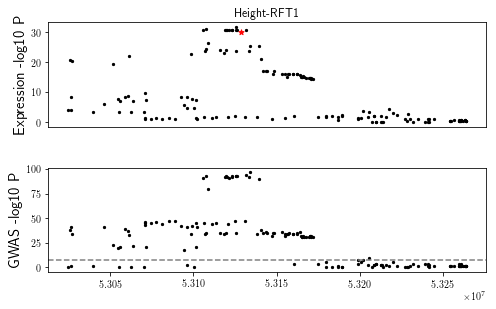

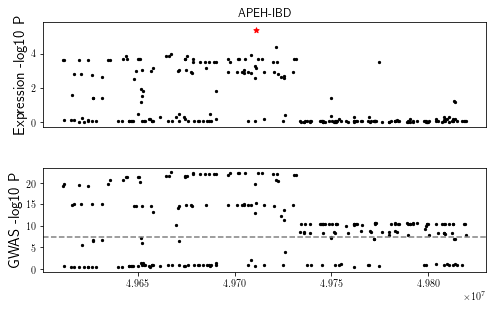

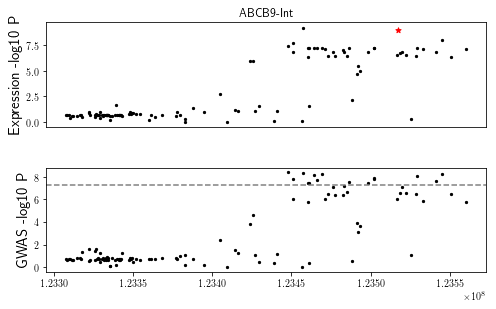

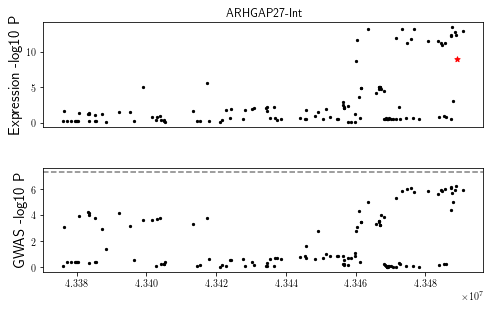

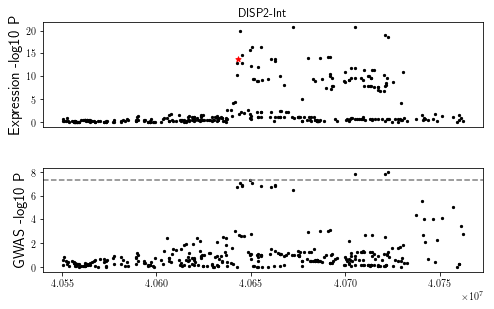

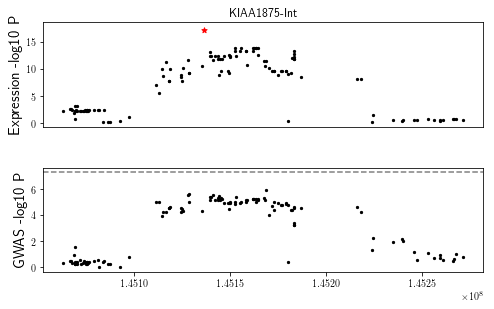

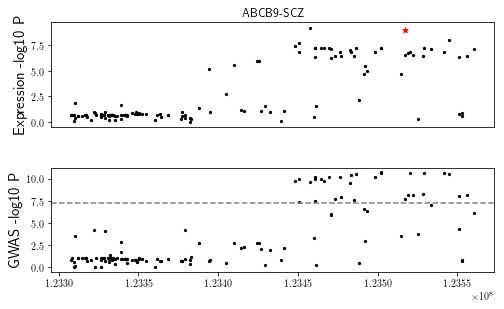

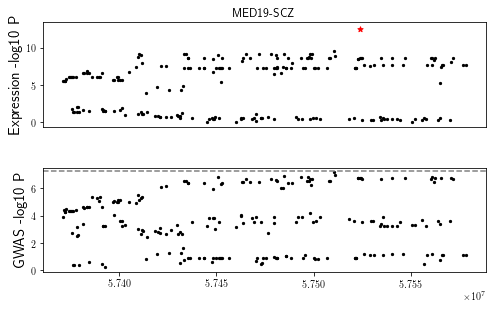

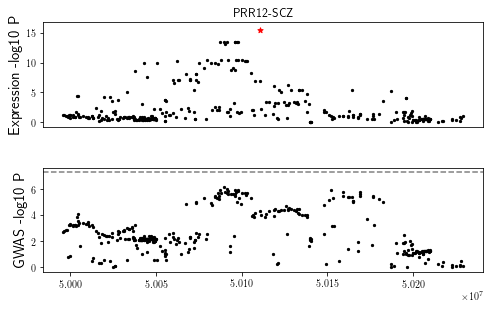

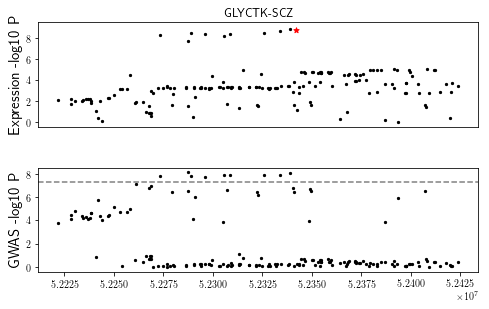

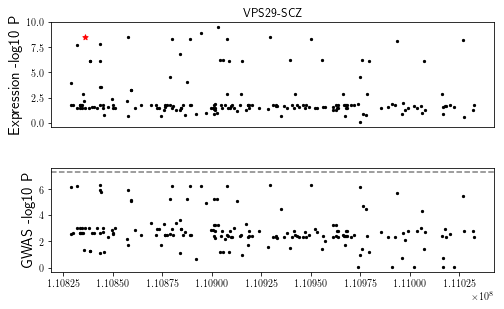

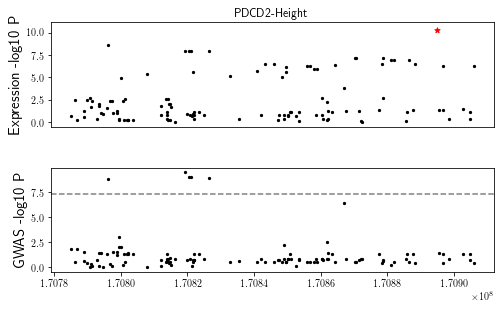

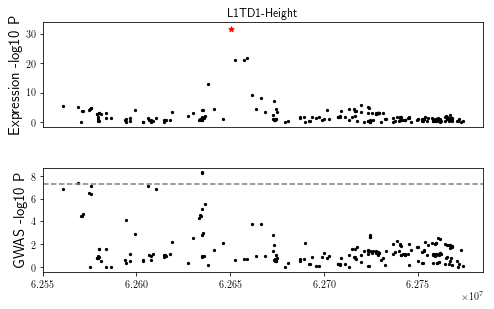

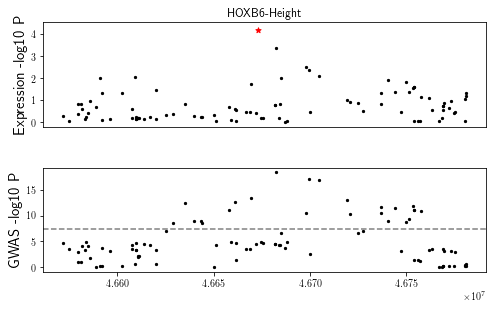

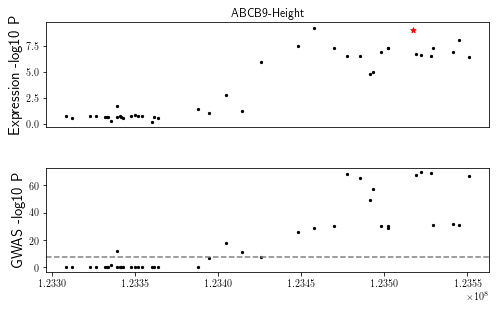

In [5]:
for ex in examples:
    label, pvalfile, strpos, strpval = ex
    fname = os.path.join(RESULTSDIR, "%s_%s_GWAS.pdf"%("GWASExamples", label))
    PlotColoc(pvalfile, strpos, strpval, label=label, fname=fname)